Background

Managing missed patient appointments represent a challenge for those working in
health care systems.Non-attendance at appointments decreases healthcare revenue, causes suboptimal use of clinical and administrative staff, can impact wait times for patients, and negatively affects continuity of care.
The first step to solving the problem of missed appointments is identifying why a patient skips a scheduled visit in the first place. What trends are there among patients with higher absence rates? Are there demographic indicators or perhaps time-variant relationships hiding in the data? Ultimately, it was these questions that drove my exploratory data analysis. I was curious as to the reasons behind missed appointments, and wanted to examine the data to identify any trends present. I choose this problem because I believe it is an excellent example of how data science and analysis can reveal relationships which can be implemented in the real-world to the benefit of society.

Introduction to Dataset

I wanted to choose a dataset that was both relatable and could be used to make 
smarter decisions. Therefore, I decided to work with medical appointment no shows 
data available on Kaggle.
There were a total of 14 variables I included from the original data. The variables and the description of the values are as follows:
1. PatientId: unique ID associated with a patient
2. AppointmentID: unique ID for each appointment.
3. Gender:  M or F
4. ScheduledDay :  date and time appointment was Scheduled.    
5. AppointmentDay : date of appointment without time.
6. Age : Integer age of patient.         
7. Neighbourhood :  Neighbourhood of the hospital.  
8. Scholarship : 0 or 1 indicating whether the family of the patient takes part in the Bolsa Familia Program     
9. HyperTension  :0 or 1 for condition
10. Diabetes  :  0 or 1 for condition (1 means patient was scheduled to treat condition)       
11. Alcoholism :  0 or 1 for condition    
12. HandiCap  : 0 or 1 for condition       
13. SMS_received  :  0 or 1 (1 for sending remainder)
14. No-show :  'Yes'/'No'


import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import datetime as datetime
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import chi2_contingency
from copy import deepcopy

In [3]:
no_showup=pd.read_csv('C:/Users/sandhya/Downloads/noshowappointments/KaggleV2-May-2016.csv')
no_showup.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Data wrangling:

Let’s take a look at the structure of the dataframe to identify cleaning that may need to be performed. I am renaming few of the columns to appropriate names. data is already clean without any missing values.

In [4]:
no_showup.rename(columns = {'Hipertension':'HyperTension' , 'Handcap':'HandiCap'},inplace=True)
no_showup.columns

Index([u'PatientId', u'AppointmentID', u'Gender', u'ScheduledDay',
       u'AppointmentDay', u'Age', u'Neighbourhood', u'Scholarship',
       u'HyperTension', u'Diabetes', u'Alcoholism', u'HandiCap',
       u'SMS_received', u'No-show'],
      dtype='object')

In [5]:
no_showup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
HyperTension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
HandiCap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#droping the column if all the values are null
no_show=no_showup.dropna(axis='columns',how='all')
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,HyperTension,Diabetes,Alcoholism,HandiCap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#selecting the valid age
#no_show = no_show[(no_show.Age > 0) & (no_show.Age <= 100)]

In [8]:
#Converting the date columns to  datetime64 format
no_show['ScheduledDay'] = no_show.ScheduledDay.apply(np.datetime64)
no_show['AppointmentDay'] = no_show.AppointmentDay.apply(np.datetime64)
no_show['WaitTime']=no_show.AppointmentDay-no_show.ScheduledDay
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,HyperTension,Diabetes,Alcoholism,HandiCap,SMS_received,No-show,WaitTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1 days +06:30:29
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37


In [9]:
# checking if there are any missing values

no_show.fillna('')
no_show.isnull().values.any()


False

In [10]:
for i in no_show.columns:
    unique_count=no_show[i].nunique()
    if unique_count < 20:
       print(no_show[i].value_counts())
       print('---------')
       print('\n')

F    71840
M    38687
Name: Gender, dtype: int64
---------


0    99666
1    10861
Name: Scholarship, dtype: int64
---------


0    88726
1    21801
Name: HyperTension, dtype: int64
---------


0    102584
1      7943
Name: Diabetes, dtype: int64
---------


0    107167
1      3360
Name: Alcoholism, dtype: int64
---------


0    108286
1      2042
2       183
3        13
4         3
Name: HandiCap, dtype: int64
---------


0    75045
1    35482
Name: SMS_received, dtype: int64
---------


No     88208
Yes    22319
Name: No-show, dtype: int64
---------




In [11]:
#converting gender and no-show columns to numeric values
le = preprocessing.LabelEncoder()
le.fit(['F', 'M'])
no_show['num_gender']=le.transform(no_show['Gender'])
le.fit(['No', 'Yes'])
no_show['numNoshow']=le.transform(no_show['No-show'])

In [12]:
# there is 1 invalid record which is negative. I am selecting only the valid age.
no_show=no_show[no_show.Age>=0]

In [13]:
no_show.describe()

,PatientId,AppointmentID,Age,Scholarship,HyperTension,Diabetes,Alcoholism,HandiCap,SMS_received,WaitTime,num_gender,numNoshow
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,9 days 17:08:42.047952,0.350026,0.201934
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,15 days 05:51:31.240428,0.476980,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7 days +10:10:40,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +15:41:32,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3 days 11:22:33,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14 days 07:41:37.750000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178 days 13:19:01,1.000000,1.000000


The summary of the no_show dataframe gives lot of details. Minimum age is 0 and maximum age is 115. Since there are only 4 patients with age greater then 100. I am considering it as valid.
This data summary shows that 20% of appointments are missed based on the mean for the numNoshow field. The rates for the various patient conditions can also be seen, and the most commonly coded reason for an appointment is hypertension at nearly 19.7% of visits.

In [14]:
def get_age_bucket(age):
    if age <= 18:
        return '0-18'
    elif 18 < age <= 24:
        return '18-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    elif 45 <= age <= 54:
        return '45-54'
    elif 55 <= age <= 64:
        return '55-64'
    elif 65 <= age:
        return '65+'
    else:
        return '100+'
    
no_show['age_bucket'] = no_show['Age'].apply(lambda x: get_age_bucket(x))

In [15]:
# single function to visualize feature counts and relationship with no show

def visualize_feature(df, feature):
    if no_show[feature].nunique()> 4:
        figsize = (18, 8)
    else:
        figsize = (8, 3)
        
    if feature in ['age_bucket','Neighbourhood']:
        kind = 'bar'
    else:
        kind = 'barh'
        
    sort_column = feature    
          
    aggfunc = {'numNoshow': 'count'}
    p=no_show.pivot_table(index=feature,columns='No-show',values='numNoshow', aggfunc=aggfunc).reset_index()
    p['count%'] = p['Yes'] / p['Yes'].sum()
    p = p[[feature, 'Yes', 'count%']]
    ax = p.plot(x=feature, y=['count%'], kind=kind, figsize=figsize, colormap='Set2', title='no show percentage by %s' %feature, legend=False)
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage')
    plt.show()
    

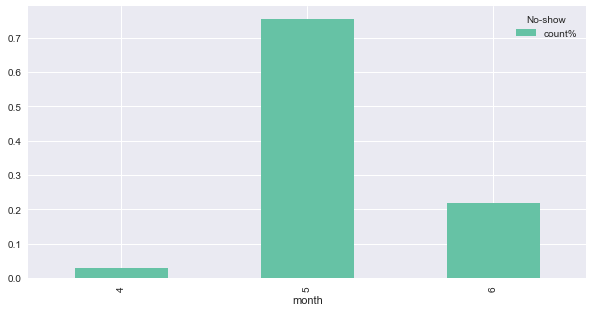

In [16]:
no_show['month'] = no_show['AppointmentDay'].dt.month
p=no_show.pivot_table(index=['month'],columns='No-show',values='numNoshow', aggfunc='count').reset_index()
p['count%'] = p['Yes'] / p['Yes'].sum()
p = p[['month', 'Yes', 'count%']]
p.plot(x='month', y=['count%'],kind='bar', figsize=(10,5), colormap='Set2')
 

Above plot shows that month may has maximum number of no shows.

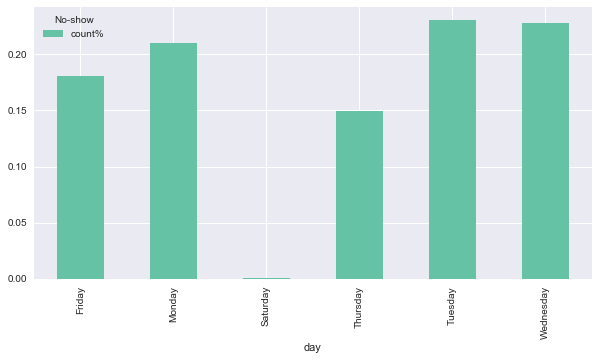

In [17]:
no_show['day']=no_show['AppointmentDay'].dt.weekday_name
p=no_show.pivot_table(index=['day'],columns='No-show',values='numNoshow', aggfunc='count').reset_index()
p['count%'] = p['Yes'] / p['Yes'].sum()
p = p[['day', 'Yes', 'count%']]
p.plot(x='day', y=['count%'],kind='bar', figsize=(10,5), colormap='Set2')
 

Based on the above graph, Tuesday and Wednessday has the highest no-show and Thusday
the least no-show. I am excluding saturday for small sample size.

C:\Users\sandhya\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


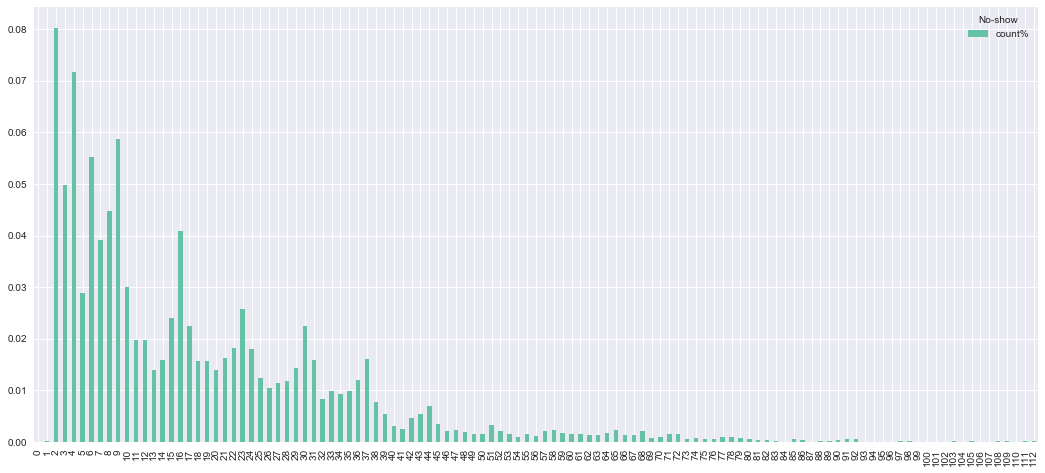

In [18]:
noshow_waittime=no_show[no_show['numNoshow']==1]

noshow_waittime['Waitdays']=noshow_waittime['WaitTime'].dt.days

x=noshow_waittime['Waitdays'].unique()
x=x.sort()
p=noshow_waittime.pivot_table(index=['Waitdays'],columns='No-show',values='numNoshow', aggfunc='count').reset_index()
p['count%'] = p['Yes'] / p['Yes'].sum()
p = p[['Waitdays', 'Yes', 'count%']]
p.plot(x=x, y=['count%'],kind='bar', figsize=(18,8), colormap='Set2')

As can be seen in the chart, a most of the patients wait less than 10 days between the scheduling and the date of their appointment.maximum wait is 112 days.

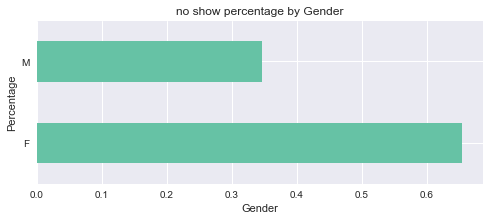

In [19]:
visualize_feature(no_show, 'Gender')

Percentage of no show up is more among female patients. There are much more women data than men data in the dataset.

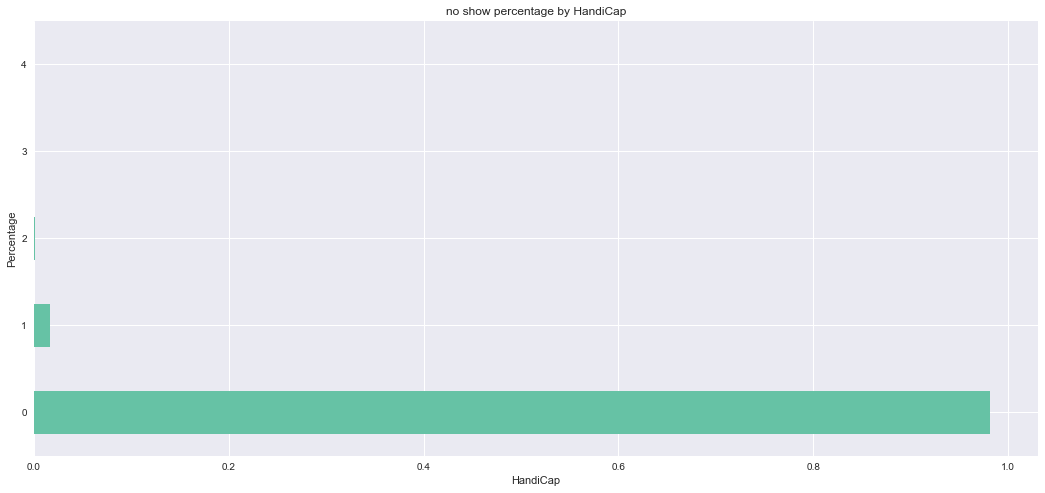

In [20]:
visualize_feature(no_show, 'HandiCap')

Patients with disability tend to not miss the appointment much.

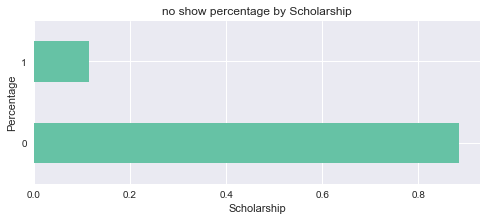

In [21]:
visualize_feature(no_show, 'Scholarship')

About 10% of the patients receive the scholarship.

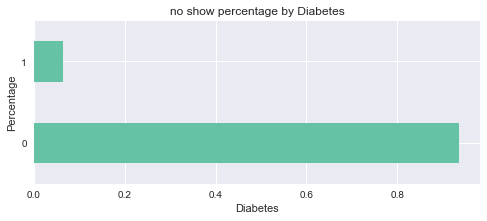

In [22]:
visualize_feature(no_show, 'Diabetes')

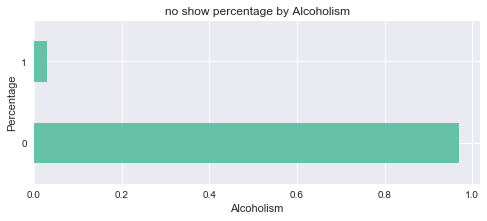

In [23]:
visualize_feature(no_show, 'Alcoholism')

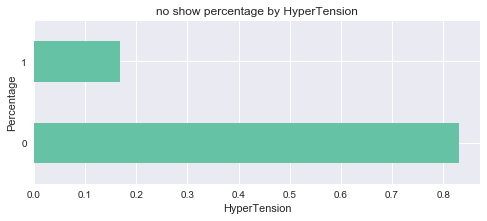

In [24]:
visualize_feature(no_show, 'HyperTension')

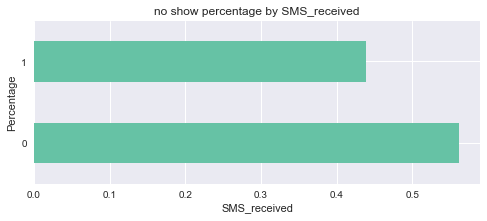

In [25]:
visualize_feature(no_show, 'SMS_received')

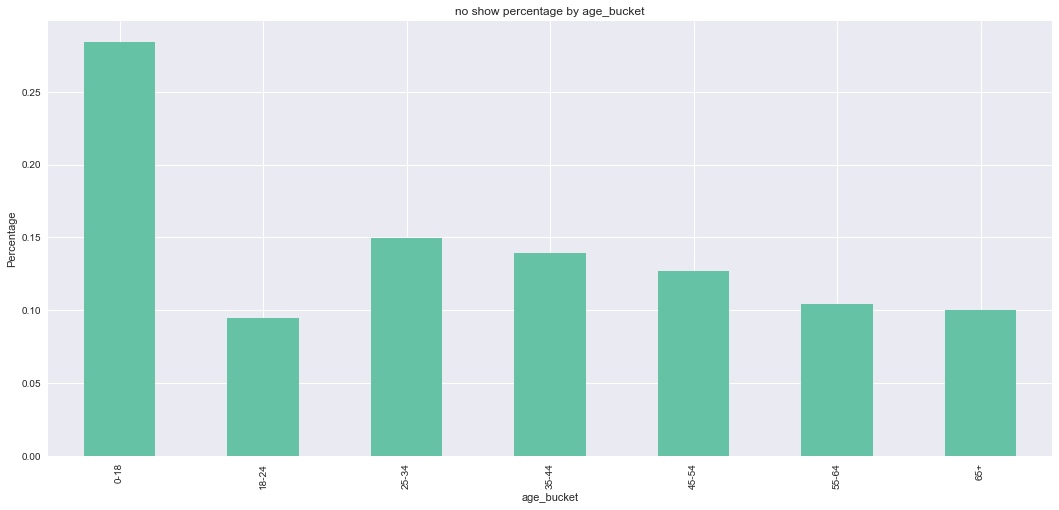

In [26]:
visualize_feature(no_show, 'age_bucket')

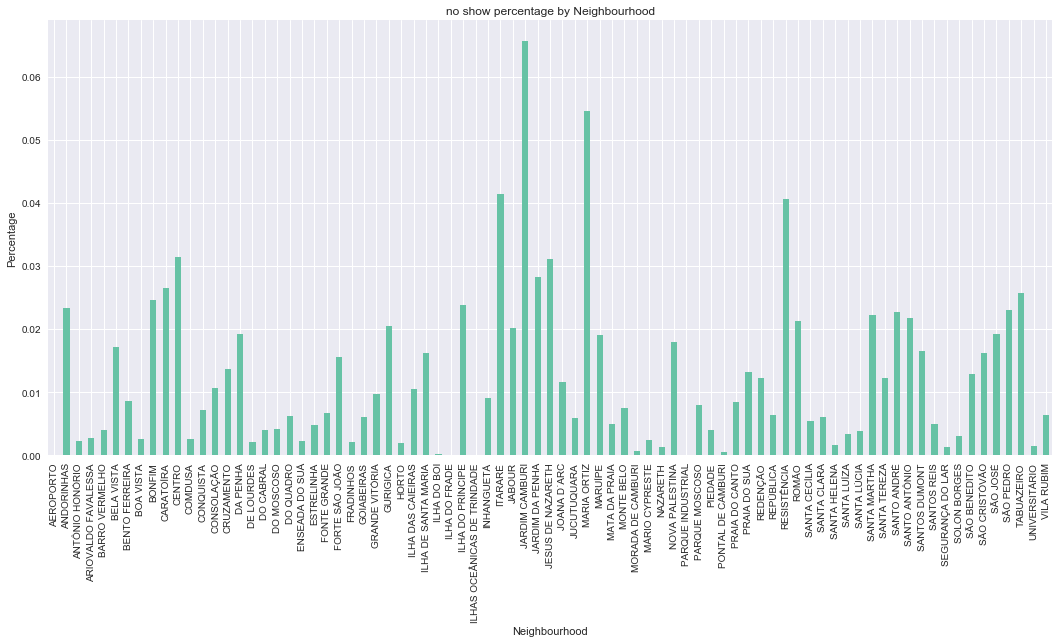

In [27]:
visualize_feature(no_show, 'Neighbourhood')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text xticklabel objects>)

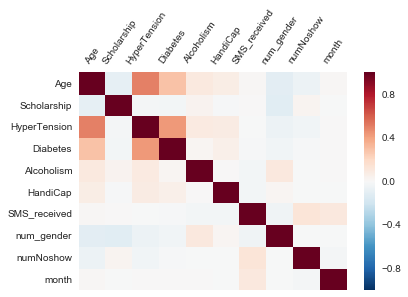

In [28]:
no_show_corr=no_show.drop(['PatientId','AppointmentID','No-show','Gender','age_bucket'],axis=1)
corr=no_show_corr.corr()
sns.heatmap(corr, vmax=1., square=False).xaxis.tick_top()
plt.xticks(rotation=55)

From the above correlation graph, there are no strong relationship to determine whether or not a patient will miss a visit (given by the numNoshows column). It appears that there are not even any strong relationships whatsoever though there is a moderate relationship between age and hypertension.